# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot

import math



## The estimation game


Root mean squared error is one of several ways to summarize the average error of an estimation process.

In [2]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

The following function simulates experiments where we try to estimate the mean of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and collect the mean and median of each sample.

In [3]:
import random

def Estimate1(n=7, iters=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))
    
Estimate1()

Experiment 1
rmse xbar 0.37363975095610774
rmse median 0.4488325774451902


Using $\bar{x}$ to estimate the mean works a little better than using the median; in the long run, it minimizes RMSE.  But using the median is more robust in the presence of outliers or large errors.


## Estimating variance

The obvious way to estimate the variance of a population is to compute the variance of the sample, $S^2$, but that turns out to be a biased estimator; that is, in the long run, the average error doesn't converge to 0.

The following function computes the mean error for a collection of estimates.

In [4]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

The following function simulates experiments where we try to estimate the variance of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and two estimates for each sample, $S^2$ and $S_{n-1}^2$.

In [5]:
def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))
    
Estimate2()

mean error biased -0.12505268440081854
mean error unbiased 0.020771868199045


The mean error for $S^2$ is non-zero, which suggests that it is biased.  The mean error for $S_{n-1}^2$ is close to zero, and gets even smaller if we increase `iters`.

## The sampling distribution

The following function simulates experiments where we estimate the mean of a population using $\bar{x}$, and returns a list of estimates, one from each experiment.

In [6]:
def SimulateSample(mu=90, sigma=7.5, n=9, iters=1000):
    xbars = []
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

xbars = SimulateSample()

Here's the "sampling distribution of the mean" which shows how much we should expect $\bar{x}$ to vary from one experiment to the next.

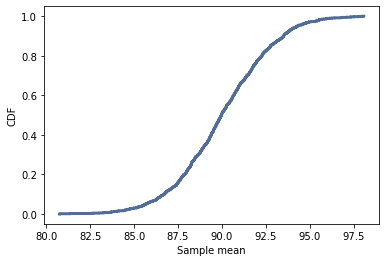

In [7]:
cdf = thinkstats2.Cdf(xbars)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')

The mean of the sample means is close to the actual value of $\mu$.

In [8]:
np.mean(xbars)

90.0435577431496

An interval that contains 90% of the values in the sampling disrtribution is called a 90% confidence interval.

In [9]:
ci = cdf.Percentile(5), cdf.Percentile(95)
ci

(85.65702993961746, 94.31691652233957)

And the RMSE of the sample means is called the standard error.

In [10]:
stderr = RMSE(xbars, 90)
stderr

2.643927745210848

Confidence intervals and standard errors quantify the variability in the estimate due to random sampling.

## Estimating rates

The following function simulates experiments where we try to estimate the mean of an exponential distribution using the mean and median of a sample. 

In [11]:
def Estimate3(n=7, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)

    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))
    
Estimate3()

rmse L 1.1639910353627287
rmse Lm 1.7079347719989466
mean error L 0.348602453983581
mean error Lm 0.42662516103339565


The RMSE is smaller for the sample mean than for the sample median.

But neither estimator is unbiased.

---
## Exercises

**Exercise 8-1:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

**RESPONSE:** (1) The bias estimator of variance yields a lower RMSE than the bias estimator. (2) As the number of samples increases, the RMSE for both X-bar and Median decreases.

In [52]:
# Solution goes here
# Develop sampling distribution



def calculate_mean_errors(mu, sigma, num_obs_per_sample, num_iters):
    """
    Calculates the mean errors for x-bar and median as estimators of the population mean.
    
    """
    x_bars = []
    medians = []

    for _ in range(num_iters):
        sample = np.random.normal(mu, sigma, num_obs_per_sample)
        x_bar = np.mean(sample)
        med = np.median(sample)
        x_bars.append(x_bar)
        medians.append(med)
    
    x_bar_err = MeanError(x_bars, mu)
    median_err = MeanError(medians, mu)
    
    print('X-bar Mean Error: {:.5f}'.format(x_bar_err))
    print('Medians Mean Error: {:.5f}'.format(median_err))

In [53]:
# Solution goes here
# X-bar vs Median

mu = 0
sigma = 1
num_obs_per_sample = 10
num_iters = 100000

run_experiment(mu, sigma, num_obs_per_sample, num_iters)

X-bar Error: -0.0003
Medians Error: -0.0001


In [50]:
# Solution goes here
# Bias variance vs Unbiased variance
# Unbiased deducts one from the denominator.

def calculate_biased_and_unbiased_rmses(mu, sigma, num_obs_per_sample, num_iters):
    """
    Calculates the biased and unbiased RMSEs.
    
    """
    bias_estimates = []
    unbias_estimates = []

    for _ in range(num_iters):
        sample = np.random.normal(mu, sigma, num_obs_per_sample)
        bias = np.var(sample)
        unbias = np.var(sample, ddof=1)
        bias_estimates.append(bias)
        unbias_estimates.append(unbias)
        
    bias_rmse = RMSE(bias_estimates, sigma**2)
    unbias_rmse = RMSE(unbias_estimates, sigma**2)
    
    print(f"Bias RMSE: {round(bias_rmse, 6)}")
    print(f"Unbias RMSE: {round(unbias_rmse, 6)}")

In [89]:
mu = 0
sigma = 1
num_obs_per_sample = 10
num_iters = 1000

calculate_biased_and_unbiased_rmses(mu, sigma, num_obs_per_sample, num_iters)

Bias RMSE: 0.426591
Unbias RMSE: 0.461375


**Exercise 8-2:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

**RESPONSE:** As the the number of obsersavtions per sample increases, the standard error decreases and the 90% CI becomes more narrow.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



In [91]:
# Solution goes here
num_iters = 1000
obs_per_sample = 100
lam = 2

xbars = []
medians = []

for _ in range(num_iters):
    sample = np.random.exponential(1.0 / lam, obs_per_sample)
    L = 1 / np.mean(sample)
    L_median = math.log(2) / np.median(sample)
    xbars.append(L)
    medians.append(L_median)



In [92]:
def vertical_line(x, y=1):
    """
    Add vertical line to plot
    """
    thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

#### Sampling Distribution of the Sample Means

Standard Error: 0.2116
90% Confidence Interval:  (1.7162484640069076, 2.3815241637078675)




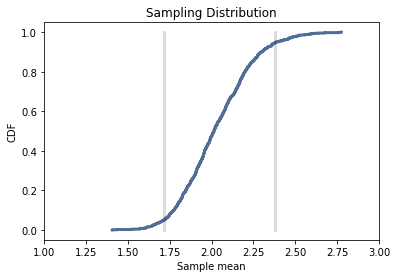

In [98]:
y_floor = 1
y_ceiling = 3

ci = cdf.Percentile(5), cdf.Percentile(95)
std_err = RMSE(xbars, lam)

cdf = thinkstats2.Cdf(xbars)
vertical_line(ci[0])
vertical_line(ci[1])
thinkplot.Cdf(cdf)

print('Standard Error: {:.4f}'.format(std_err))
print('90% Confidence Interval: ', ci)
print('\n')
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF',
                title='Sampling Distribution',
                axis=[y_floor, y_ceiling, -0.05, 1.05])

In [94]:
# SAMPLE MEANS



#### Sampling Distribution of the Sample Medians

Standard Error: 0.3080
90% Confidence Interval:  (1.7162484640069076, 2.3815241637078675)




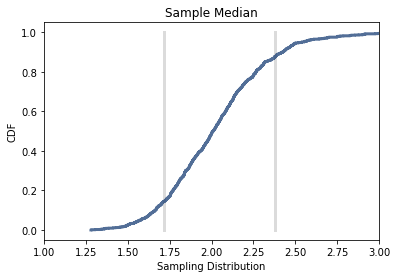

In [100]:
y_floor = 1
y_ceiling = 3

ci = cdf.Percentile(5), cdf.Percentile(95)
std_err = RMSE(medians, lam)
cdf = thinkstats2.Cdf(medians)

print('Standard Error: {:.4f}'.format(std_err))
print('90% Confidence Interval: ', ci)
print('\n')

vertical_line(ci[0])
vertical_line(ci[1])
cdf = thinkstats2.Cdf(medians)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sampling Distribution',
                 ylabel='CDF',
                title='Sample Median',
                axis=[y_floor, y_ceiling, -0.05, 1.05])

---
**Exercise 8-3:** In games like hockey and soccer, the time between goals is roughly exponential. So you could estimate a team’s goal-scoring rate by observing the number of goals they score in a game. This estimation process is a little different from sampling the time between goals, so let’s see how it works.

Write a function that takes a goal-scoring rate, `lam`, in goals per game, and simulates a game by generating the time between goals until the total time exceeds 1 game, then returns the number of goals scored.

Write another function that simulates many games, stores the estimates of `lam`, then computes their mean error and RMSE.

Is this way of making an estimate biased?

**RESPONSE:** 

- As lambda increases, the number of goals with the greatest probability increases; however, the level of probability decreases compared to distributions that are generated with a lower lambda. The distribution's srpead increases.

- The mean error decreases as the number of games simulated increases, signifying that is **unbiased**.

- If the time between goals is exponential, the distribution of goals scored in a game is Poisson.



In [101]:
def SimulateGame(lam):
    """Simulates a game and returns the estimated goal-scoring rate.

    lam: actual goal scoring rate in goals per game
    """
    goals = 0
    t = 0
    while True:
        time_between_goals = random.expovariate(lam)
        t += time_between_goals
        if t > 1:
            break
        goals += 1

    # estimated goal-scoring rate is the actual number of goals scored
    L = goals
    return L

In [115]:
# Solution goes here
def simulate_many_games(lam, num_games):
    """
    Simulates selected number of games.
    Returns the scoring rate, lambda, for each simulated game.
    """
    
    lambda_estimates = []
    #cdfs = []
    
    for _ in range(num_games):
        L = SimulateGame(lam)
        lambda_estimates.append(L)
        
    
    rmse = RMSE(lambda_estimates, lam)
    mean_err = MeanError(lambda_estimates,lam)
    
    # Use PMF because goals scored per game are used to reference DISCRETE random variables.
    pmf = thinkstats2.Pmf(lambda_estimates)
    
    print(f"L RMSE: {round(rmse,5)}")
    print(F"L Mean Error: {round(mean_err, 5)}")
    
    thinkplot.Hist(pmf)
    

L RMSE: 2.44681
L Mean Error: -0.00273


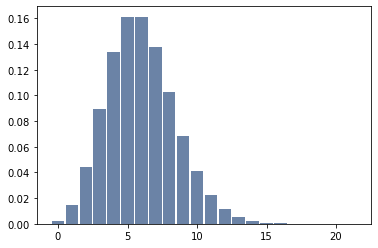

In [118]:
lam = 6
num_games = 1000000

simulate_many_games(lam, num_games)

In [106]:
# Solution goes here

num_games = 100
scoring_rates = np.arange(1, 6)

rmse_arr = []
std_err_arr = []
pmf_arr = []

for rate in scoring_rates:
    rmse, mean_err, cdf = simulate_many_games(rate, 100)
    rmse_arr.append(rmse)
    std_err_arr.append(mean_err)
    pmf_arr.append(cdf)

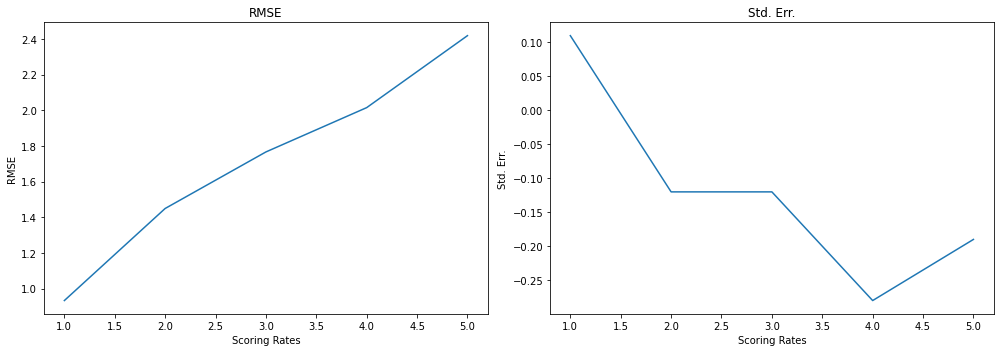

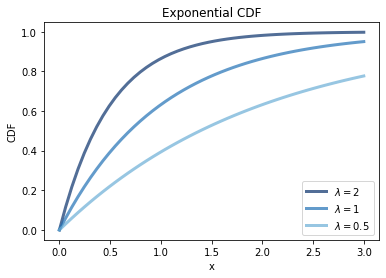

In [108]:
thinkplot.PrePlot(3)
for lam in [2.0, 1, 0.5]:
    xs, ps = thinkstats2.RenderExpoCdf(lam, 0, 3.0, 50)
    label = r'$\lambda=%g$' % lam
    thinkplot.Plot(xs, ps, label=label)
    
thinkplot.Config(title='Exponential CDF', xlabel='x', ylabel='CDF', 
                 loc='lower right')

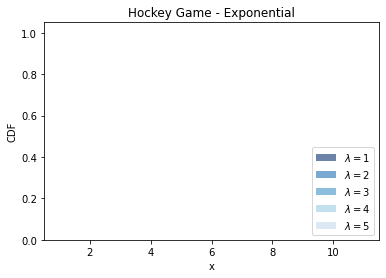

In [110]:
thinkplot.PrePlot(5)

for num, pmf in enumerate(pmf_arr):
    num = num + 1
    label = r'$\lambda=%g$' % num
    thinkplot.Hist(pmf, label=label)

    
thinkplot.Config(title='Hockey Game - Exponential', xlabel='x', ylabel='CDF', loc='lower right')